
1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

In [37]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

import wrangle_zillow
import acquire

pd.set_option('display.max_rows', 100)
import env 
from pydataset import data


import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

In [2]:
df = wrangle_zillow.acquire()



In [3]:
df = wrangle_zillow.prepare(df)


In [4]:
df = wrangle_zillow.handle_missing_values(df, .9, 1)


In [5]:
train, validate, test = wrangle_zillow.train_validate_test_split(df)


train	 n = 29367
test	 n = 10489
validate n = 12586


In [6]:
quant_cols = [col for col in df.columns if ((df[col].dtype != 'object') 
                                             & (len(df[col].unique()) > 10) 
                                             & ('regionid' not in col) 
                                             & ('census' not in col))]

train, validate, test = wrangle_zillow.remove_outliers(train, validate, test, 1.5, quant_cols)

train	 n = 23851
test	 n = 8516
validate n = 10172


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52442 entries, 0 to 77579
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   logerror                   52442 non-null  float64
 1   transactiondate            52442 non-null  object 
 2   bathroomcnt                52442 non-null  float64
 3   bedroomcnt                 52442 non-null  float64
 4   fips                       52442 non-null  float64
 5   fireplacecnt               52442 non-null  float64
 6   garagecarcnt               52442 non-null  float64
 7   garagetotalsqft            52442 non-null  float64
 8   hashottuborspa             52442 non-null  float64
 9   latitude                   52442 non-null  float64
 10  longitude                  52442 non-null  float64
 11  poolcnt                    52442 non-null  float64
 12  propertycountylandusecode  52442 non-null  object 
 13  regionidcounty             52442 non-null  flo

### a1. Does logerror differ across counties (fips)?

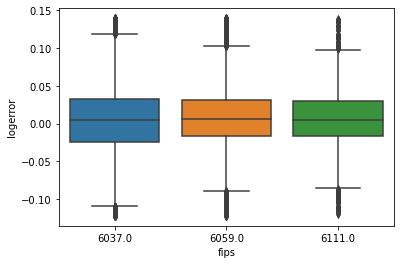

In [8]:
# visualize
sns.boxplot(data=train, x='fips', y='logerror')
plt.show()

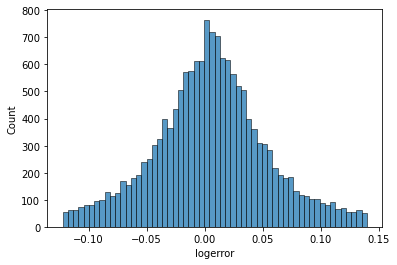

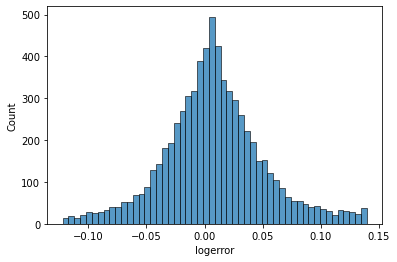

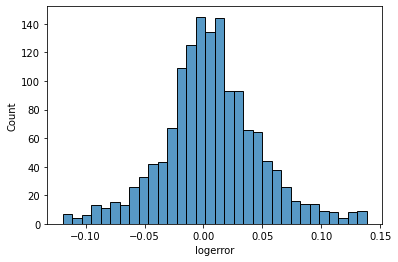

In [9]:
# verify assumptions: normal distribution
for fips_code in train.fips.unique():
    county = train[train.fips == fips_code]
    sns.histplot(county.logerror)
    plt.show()

In [10]:
county1 = df[df.fips == df.fips.unique()[0]]
county2 = df[df.fips == df.fips.unique()[1]]
county3 = df[df.fips == df.fips.unique()[2]]

alpha = .05
stat, p = stats.levene(county1.logerror, county2.logerror, county3.logerror)
if p < alpha:
    print('equal variances')
else: print('unequal variances')

equal variances


In [11]:
alpha = .05
stat, p = stats.f_oneway(county1.logerror, county2.logerror, county3.logerror)
stat, p

(20.05877415554803, 1.958464169690811e-09)

In [12]:
if p < alpha:
    print('reject H0')
else: print('fail to reject H0')

reject H0


We reject the null hypothesis and proceed under the assumption that there is a difference in logerror among the three counties in our dataset

### @2. Does logerror differ for properties that have garages vs. those that don't?


In [13]:
# get the data
garages = train[train.has_garage == 1]
no_garages = train[train.has_garage == 0]

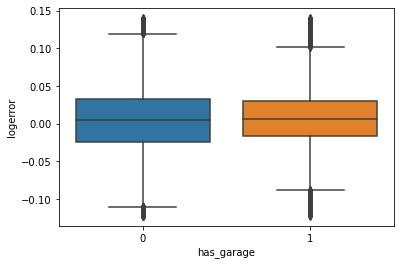

In [14]:
# visualize:
sns.boxplot(data=train, 
            x='has_garage',
            y='logerror')
plt.show()

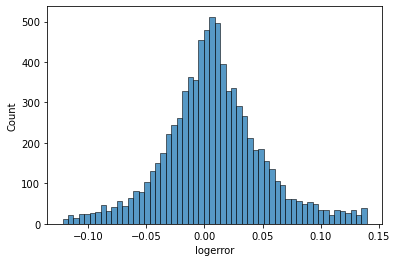

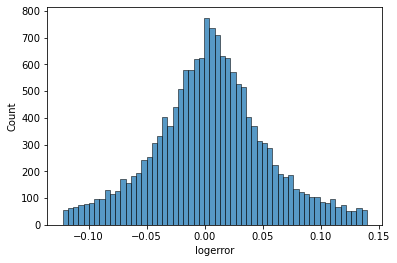

In [15]:
# verify assumptions: normal distribution
for subset in [garages, no_garages]:
    sns.histplot(subset.logerror)
    plt.show()


In [16]:
# verify assumptions: equal variances:
alpha = .05
stat, p = stats.levene(garages.logerror, no_garages.logerror)
if p < alpha:
    print('equal variances')
else: print('unequal variances')

equal variances


In [17]:
# perform the test
alpha = .05
t, p = stats.ttest_ind(garages.logerror, no_garages.logerror)
stat, p

(175.06170915774973, 8.159887094159913e-05)

In [18]:
if p < alpha:
    print('reject H0')
else: print('fail to reject H0')

reject H0


We reject the null hypothesis and proceed under the assumption that there is a difference in logerror for properties with garages compared to those without



### a3. Does logerror differ for properties that have pools vs those that don't


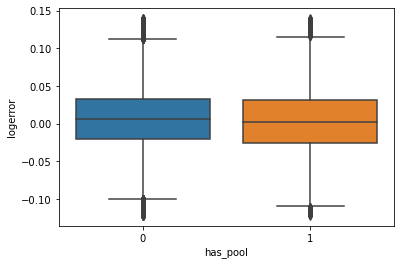

In [19]:
# visualize
sns.boxplot(data=train, x='has_pool', y='logerror')
plt.show()

In [20]:
# get data
pools = train[train.has_pool == 1]
no_pools = train[train.has_pool == 0]

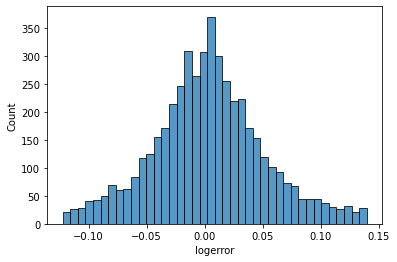

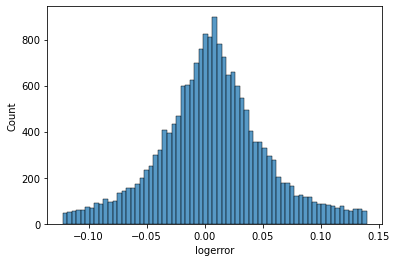

In [21]:
# verify assumptions: normal distribution
for subset in [pools, no_pools]:
    sns.histplot(subset.logerror)
    plt.show()

In [22]:
# verify assumptions: equal variances:
alpha = .05
stat, p = stats.levene(pools.logerror, no_pools.logerror)
if p < alpha:
    print('equal variances')
else: print('unequal variances')


equal variances


In [23]:
# perform the test
alpha = .05
t, p = stats.ttest_ind(pools.logerror, no_pools.logerror)
stat, p

(10.574748978773288, 2.0350905344727646e-06)

In [24]:
if p < alpha:
    print('reject H0')
else: print('fail to reject H0')

reject H0


We reject the null hypothesis and proceed under the assumption that there is a difference in logerror for properties with pools compared to those without



### a4. Does logerror differ for properties that have a hot tub or spa vs those that don't?


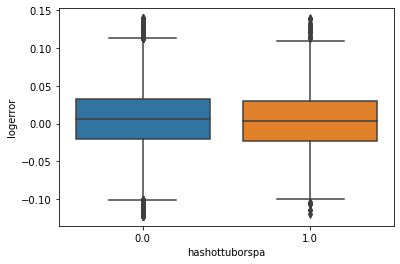

In [25]:
# visualize
sns.boxplot(data=train, x='hashottuborspa', y='logerror')
plt.show()


In [26]:
# get the data
hottubs = train[train.hashottuborspa == 1]
no_hottubs = train[train.hashottuborspa == 0]

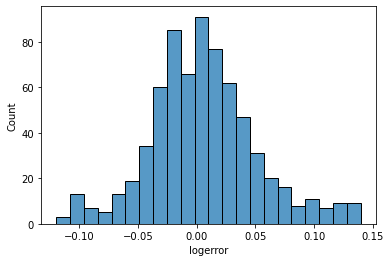

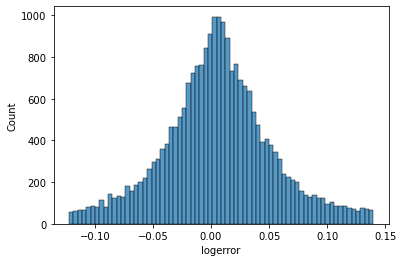

In [27]:
# verify assumptions: normal distribution
for subset in [hottubs, no_hottubs]:
    sns.histplot(subset.logerror)
    plt.show()

In [28]:
# verify assumptions: equal variances:
alpha = .05
stat, p = stats.levene(hottubs.logerror, no_hottubs.logerror)
if p < alpha:
    print('equal variances')
else: print('unequal variances')

unequal variances


In [29]:
# perform the test (unequal variances >> non-parametric test == Mann-Whitney)
alpha = .05
stat, p = stats.mannwhitneyu(hottubs.logerror, no_hottubs.logerror)
stat, p

(7886869.0, 0.44178782185743715)

In [30]:
if p < alpha:
    print('reject H0')
else: print('fail to reject H0')

fail to reject H0


We fail to reject the null hypothesis and we proceed under the assumption that: there is no difference in logerror for properties with and without hot tubs / spas



### a5. Is there a difference in logerror for properties with fireplaces vs those without?


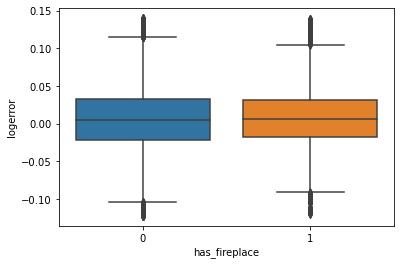

In [31]:
# visualize:
sns.boxplot(data=train, 
            x='has_fireplace',
            y='logerror')
plt.show()

In [32]:
# get the data
fireplaces = train[train.has_fireplace == 1]
no_fireplaces = train[train.has_fireplace == 0]

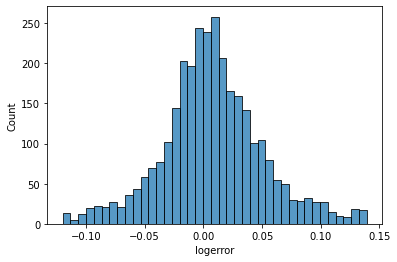

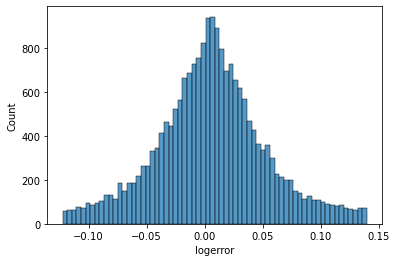

In [33]:
# verify assumptions: normal distribution
for subset in [fireplaces, no_fireplaces]:
    sns.histplot(subset.logerror)
    plt.show()

In [34]:
# verify assumptions: equal variances:
alpha = .05
stat, p = stats.levene(hottubs.logerror, no_hottubs.logerror)
if p < alpha:
    print('equal variances')
else: print('unequal variances')


unequal variances


In [35]:
# perform the test (unequal variances >> non-parametric test == Mann-Whitney)
alpha = .05
stat, p = stats.mannwhitneyu(fireplaces.logerror, no_fireplaces.logerror)
stat, p

(32671550.5, 0.0769805782469288)

In [36]:
if p < alpha:
    print('reject H0')
else: print('fail to reject H0')

fail to reject H0


We fail to reject the null hypothesis and proceed under the assumption that there is no difference in logerror for properties with fireplaces vs those without.



**BONUS:** Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [39]:
df = wrangle_zillow.acquire()


In [40]:
df = df[['regionidzip', 'logerror']]
df = df.dropna()


In [42]:
train, validate, test = wrangle_zillow.train_validate_test_split(df)



train	 n = 43416
test	 n = 15506
validate n = 18608


In [43]:
alpha = .05
zipcode_list = [] # for storing zipcodes whose errors are significantly different from average
for zipcode in train.regionidzip.unique():
    subset = df[df.regionidzip == zipcode]
    _, p = stats.ttest_1samp(subset.logerror, train.logerror.mean())
    if p < .05:
        zipcode_list.append(zipcode)

In [44]:
# zipcodes where the logerror is significantly different that the overall error:
for zipcode in zipcode_list:
    print(int(zipcode))


96336
96124
96004
96996
96475
96378
96993
96492
96356
96117
96241
96104
96026
95984
96508
96465
96957
96280
96217
96349
96326
96152
96325
96974
96985
96293
96043
96171
96415
97068
96197
96426
96007
96095
96190
96218
96514
96339
96294
96245
96020
96379
97051
96244
97064
96327
96946
96047
96478
96137
96517
96107
96228
96097
97298
96120
96387
97039
96103
95989
96038
96216
96951
